In [1]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import *
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from tabulate import tabulate
from Convolution import createWaves
from CNOTcalculator import calculateCNOT
import json
from dataRead import *

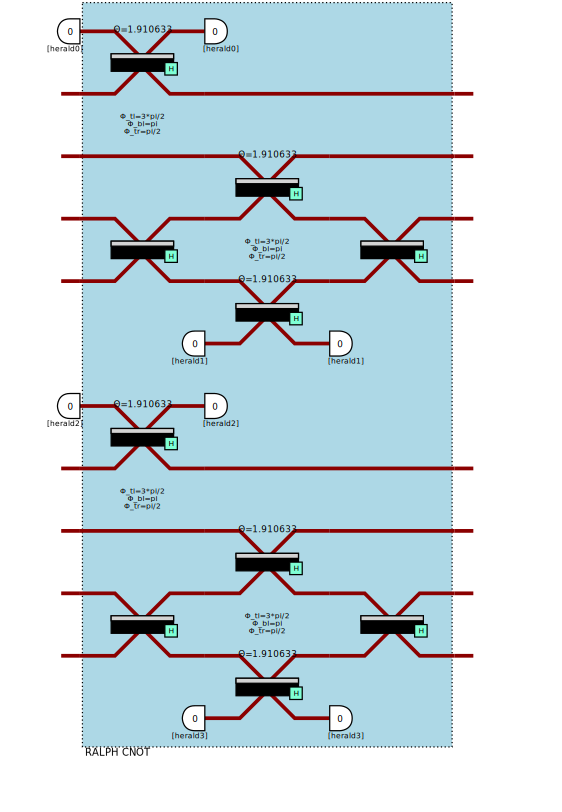

In [2]:
n = 3 #Nombre de modes spatiaux
m = 3 #Nombre de modes internes
k = 3 #Nombre de photon
cnot = pcvl.Circuit(12, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
#first copy
cnot.add((6, 7), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((9, 10), pcvl.BS.H())
cnot.add((8, 9), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((10, 11), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((9, 10), pcvl.BS.H())

p = pcvl.Processor("Naive", cnot)
#p.set_postprocess(lambda s: (s[1] or s[2] or s[7] or s[8]) and (s[3] or s[4] or s[9] or s[10]))
p.add_herald(0, 0)
p.add_herald(5, 0)
p.add_herald(6, 0)
p.add_herald(11, 0)

pcvl.pdisplay(p, recursive = True)




In [3]:

names = ['./acquired_data/xp_00/data.json','./acquired_data/xp_01/data.json','./acquired_data/xp_02/data.json','./acquired_data/xp_03/data.json','./acquired_data/xp_04/data.json','./acquired_data/xp_05/data.json','./acquired_data/xp_06/data.json','./acquired_data/xp_07/data.json','./acquired_data/xp_08/data.json','./acquired_data/xp_09/data.json']
dictData = {}
Val = {}
delayValArr = []
g2 = 0.007
for name in names:
    TableValue,compareVal,realValMax,realValMin,delayVal,waves,time = calculateCNOT(p,name)
    delayValArr.append(delayVal)
    Val[name[16:21]] = 2*(1-Overlap(waves[0],waves[1],time)**2)
    dictData[name[16:21]] = TableValue
    print(TableValue)



0.997066*|1,0,1,0,0,0,0,0>+0.076552*|1,0,0,0,0,0,1,0>
statesProb
|1,1,0,0> 0.5000000000000001
|1,0,1,0> 0.49999999999999994
0.997066*|1,0,0,1,0,0,0,0>+0.076552*|1,0,0,0,0,0,0,1>
statesProb
|1,1,0,0> 0.5
|1,0,0,1> 0.5
0.997066*|0,1,1,0,0,0,0,0>+0.076552*|0,1,0,0,0,0,1,0>
statesProb
|0,1,0,1> 0.4980465950143966
|0,0,1,1> 0.4980465950143964
|0,2,0,0> 0.000976702492801774
|0,1,1,0> 0.001953404985603548
|0,0,2,0> 0.000976702492801774
0.997066*|0,1,0,1,0,0,0,0>+0.076552*|0,1,0,0,0,0,0,1>
statesProb
|0,1,1,0> 0.4980465950143964
|0,0,1,1> 0.4980465950143966
|0,2,0,0> 0.0009767024928017736
|0,1,0,1> 0.0019534049856035473
|0,0,0,2> 0.0009767024928017736
[['00', '01', '10', '11'], ['00', 0.49999999999999994, 0, 0, 0], ['01', 0, 0.5, 0, 0], ['10', 0, 0, 0.001953404985603548, 0.4980465950143966], ['11', 0, 0, 0.4980465950143964, 0.0019534049856035473]]
0.928017*|1,0,1,0,0,0,0,0>+0.372537*|1,0,0,0,0,0,1,0>
statesProb
|1,1,0,0> 0.5000000000000002
|1,0,1,0> 0.5
0.928017*|1,0,0,1,0,0,0,0>+0.372537*|1,0

In [4]:
""" j = json.dumps(dictData,indent = 4)

with open('data.json', 'w') as f:
    print(j, file=f) """


" j = json.dumps(dictData,indent = 4)\n\nwith open('data.json', 'w') as f:\n    print(j, file=f) "

In [8]:
modelVal = []
for key,table in dictData.items():
    print(tabulate(table,headers='firstrow',tablefmt="fancy_grid"))
    print(Val[key])
    modelVal.append((table[3][3]/(table[3][4])))


╒════╤══════╤══════╤═══════════╤═══════════╕
│    │   00 │   01 │        10 │        11 │
╞════╪══════╪══════╪═══════════╪═══════════╡
│ 00 │  0.5 │  0   │ 0         │ 0         │
├────┼──────┼──────┼───────────┼───────────┤
│ 01 │  0   │  0.5 │ 0         │ 0         │
├────┼──────┼──────┼───────────┼───────────┤
│ 10 │  0   │  0   │ 0.0019534 │ 0.498047  │
├────┼──────┼──────┼───────────┼───────────┤
│ 11 │  0   │  0   │ 0.498047  │ 0.0019534 │
╘════╧══════╧══════╧═══════════╧═══════════╛
0.009551622901853962
╒════╤══════╤══════╤═══════════╤═══════════╕
│    │   00 │   01 │        10 │        11 │
╞════╪══════╪══════╪═══════════╪═══════════╡
│ 00 │  0.5 │  0   │ 0         │ 0         │
├────┼──────┼──────┼───────────┼───────────┤
│ 01 │  0   │  0.5 │ 0         │ 0         │
├────┼──────┼──────┼───────────┼───────────┤
│ 10 │  0   │  0   │ 0.0462612 │ 0.453739  │
├────┼──────┼──────┼───────────┼───────────┤
│ 11 │  0   │  0   │ 0.453739  │ 0.0462612 │
╘════╧══════╧══════╧═══════════╧══

In [6]:
valQuandela1 = []
valQuandela2 = []
valQuandela = []
theoQuandela = []
for name in names:
    time, env1, env2 ,delay, table, vHom = xpRead(name)
    valQuandela1.append(table[2][2]/table[2][3])
    valQuandela2.append(table[3][3]/table[3][2])
    valQuandela.append(table[3][3])
    Ms = (vHom-0.007)/(1-0.007)
    theoQuandela.append(2*(1-Ms))
    print(tabulate(table))
print(valQuandela1)
print(valQuandela2)

----------  ---------  -----------  -----------
0.968744    0.024115   0.0067302    0.000411189
0.0227481   0.968699   0.000256919  0.00829636
0.00635832  0.0378687  0.091515     0.864258
0.0183408   0.0327781  0.840672     0.108209
----------  ---------  -----------  -----------
----------  ---------  ----------  -----------
0.968455    0.0250074  0.00617474  0.000362584
0.0219593   0.97059    0.00020177  0.0072493
0.00770235  0.0346685  0.152837    0.804792
0.0164343   0.0313356  0.77457     0.17766
----------  ---------  ----------  -----------
----------  ---------  -----------  ----------
0.96857     0.0250095  0.00601451   0.00040616
0.0224933   0.969577   0.000178636  0.00775082
0.00985957  0.0303298  0.254385     0.705425
0.014188    0.0284078  0.666668     0.290736
----------  ---------  -----------  ----------
---------  ---------  ----------  -----------
0.96915    0.024608   0.00584284  0.000399603
0.0220389  0.97001    0.00018816  0.00776282
0.0115142  0.0270904  0.327421 

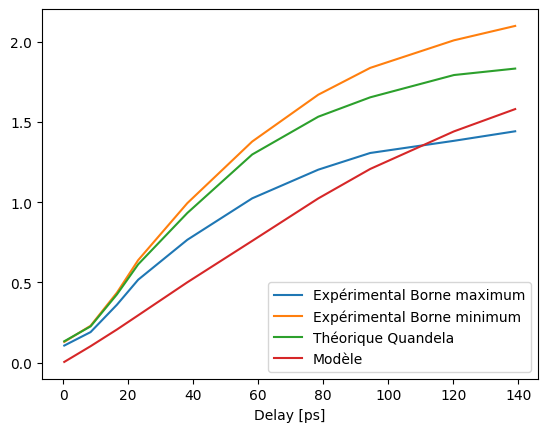

In [7]:
plt.plot(delayValArr,valQuandela1,label = 'Expérimental Borne maximum')
plt.plot(delayValArr,valQuandela2,label = 'Expérimental Borne minimum')
#plt.plot(delayValArr,Val.values(),label = 'Théorique')
plt.plot(delayValArr,theoQuandela,label = 'Théorique Quandela')
plt.plot(delayValArr,modelVal,label = 'Modèle')
plt.xlabel('Delay [ps]')
plt.ylabel('')
plt.legend()
plt.show()